In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [127]:
df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
df.head()

Unnamed: 0        date  value       GPRD    GPRD_ACT  GPRD_THREAT  \
0           0  2000-01-04  25.56  93.751915  116.829170    71.461182   
1           1  2000-01-05  24.65  47.565075   47.418663    56.502644   
2           2  2000-01-06  24.79  52.012840   51.852737    59.469170   
3           3  2000-01-07  24.79  41.667515   41.539261    54.446617   
4           4  2000-01-10  24.71  65.595398   58.127548    72.726173   

   daily_policy_index    sprtrn   spindx  oil_return  
0              109.31 -0.038345  1399.42   -0.007825  
1              123.22  0.001922  1402.11   -0.036917  
2               53.61  0.000956  1403.45    0.005647  
3               42.03  0.027090  1441.47    0.000000  
4               44.18  0.011190  1457.60   -0.003238

In [128]:
df=df.drop(['Unnamed: 0'],axis=1)

In [129]:
df.head()

date  value       GPRD    GPRD_ACT  GPRD_THREAT  daily_policy_index  \
0  2000-01-04  25.56  93.751915  116.829170    71.461182              109.31   
1  2000-01-05  24.65  47.565075   47.418663    56.502644              123.22   
2  2000-01-06  24.79  52.012840   51.852737    59.469170               53.61   
3  2000-01-07  24.79  41.667515   41.539261    54.446617               42.03   
4  2000-01-10  24.71  65.595398   58.127548    72.726173               44.18   

     sprtrn   spindx  oil_return  
0 -0.038345  1399.42   -0.007825  
1  0.001922  1402.11   -0.036917  
2  0.000956  1403.45    0.005647  
3  0.027090  1441.47    0.000000  
4  0.011190  1457.60   -0.003238

In [130]:
df=df.drop(['date'],axis=1)

In [131]:
df1=df.drop(['oil_return','value'],axis=1)
df1.head()

GPRD    GPRD_ACT  GPRD_THREAT  daily_policy_index    sprtrn   spindx
0  93.751915  116.829170    71.461182              109.31 -0.038345  1399.42
1  47.565075   47.418663    56.502644              123.22  0.001922  1402.11
2  52.012840   51.852737    59.469170               53.61  0.000956  1403.45
3  41.667515   41.539261    54.446617               42.03  0.027090  1441.47
4  65.595398   58.127548    72.726173               44.18  0.011190  1457.60

In [132]:
scaler=StandardScaler()
df2=scaler.fit_transform(df1)

In [133]:
## Instantiate PCA and choose how many components
MyPCA=PCA(n_components=3)

# Project the original data into the PCA space
Result=MyPCA.fit_transform(df2)

## Print the values of the first component 
#print(Result[:,0]) 
# print(Result) ## Print the new (transformed) dataset
# print("The eigenvalues:", MyPCA.explained_variance_)
MyPCA.explained_variance_

array([2.45746604, 1.21316967, 0.99877028])

In [134]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(Result)

KMeans(n_clusters=3, random_state=0)

In [135]:
# get cluster labels
labels = kmeans.labels_
# centers = kmeans.cluster_centers_
# # add cluster result to df
# df['cluster'] = labels

In [136]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [137]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
df['cluster'] = labels

In [ ]:
cluster_price_analysis = df.groupby('cluster')['oil_return'].describe()

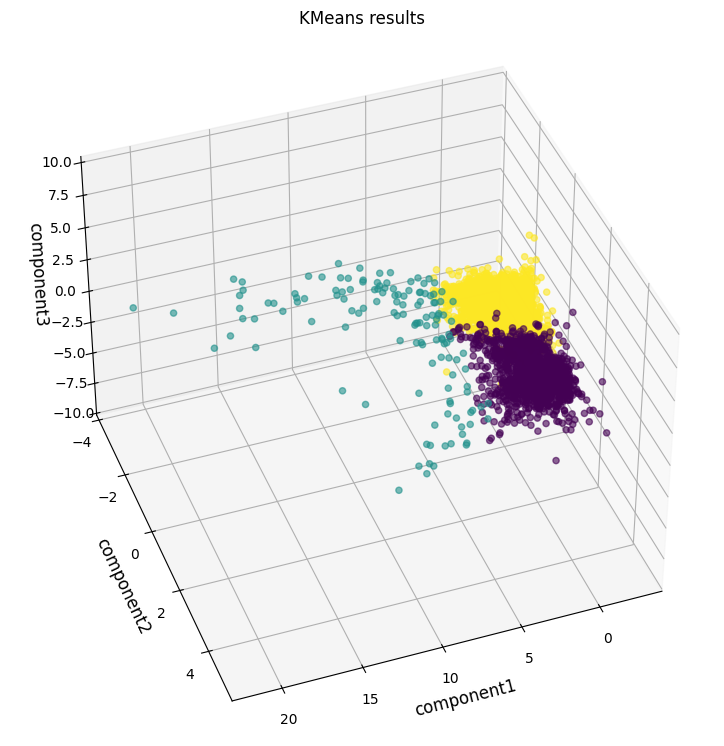

In [138]:
###########plot 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels, cmap='viridis', alpha=0.6)
# ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X')
ax.view_init(elev=40., azim=70)
ax.set_title('KMeans results',fontsize=12)
ax.set_xlabel('component1',fontsize=12)
ax.set_ylabel('component2',fontsize=12)
ax.set_zlabel('component3',fontsize=12)
plt.colorbar(scatter)
plt.show()

In [139]:
sse = []
silhouette_avg = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(Result)
    sse.append(kmeans.inertia_)
    score = silhouette_score(Result, labels)
    silhouette_avg.append(score)

d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


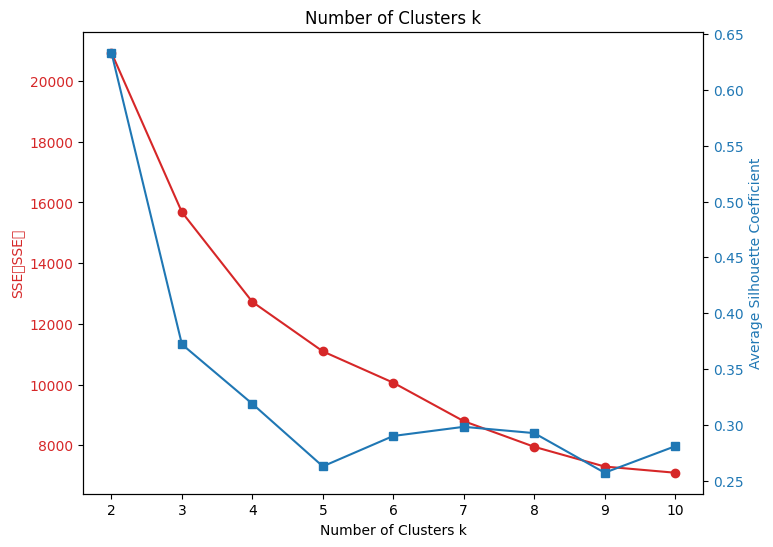

In [140]:
# plot result
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('SSE（SSE）', color=color)
ax1.plot(k_range, sse, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_range)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Silhouette Coefficient', color=color)
ax2.plot(k_range, silhouette_avg, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Clusters k')
plt.show()

In [145]:
kmeans_pca5 = KMeans(n_clusters=5, random_state=0)
kmeans_pca5.fit(Result)
labels_pca5 = kmeans_pca5.labels_
centroids = kmeans_pca5.cluster_centers_

In [167]:
kmeans_pca4 = KMeans(n_clusters=4, random_state=0)
kmeans_pca4.fit(Result)
labels_pca4 = kmeans_pca4.labels_
centroids4 = kmeans_pca4.cluster_centers_

In [171]:
kmeans_pca3 = KMeans(n_clusters=3, random_state=0)
kmeans_pca3.fit(Result)
labels_pca3 = kmeans_pca3.labels_
centroids3 = kmeans_pca3.cluster_centers_

In [173]:
kmeans_pca2 = KMeans(n_clusters=2, random_state=0)
kmeans_pca2.fit(Result)
labels_pca2 = kmeans_pca2.labels_
centroids2 = kmeans_pca2.cluster_centers_

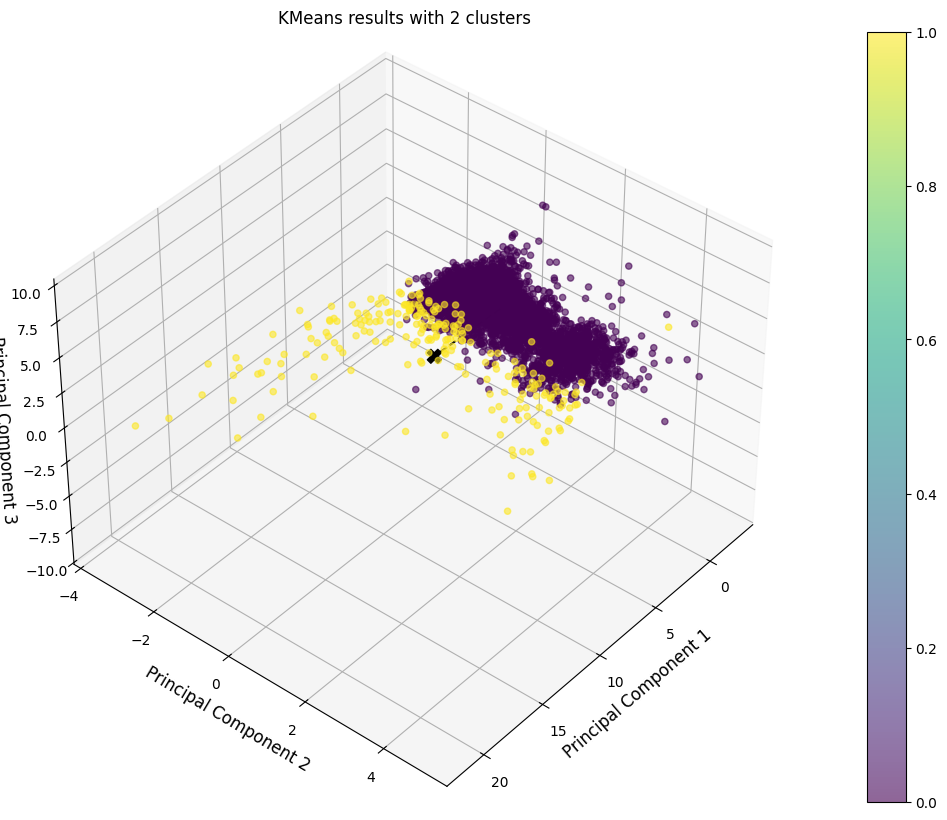

In [174]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_pca2, cmap='viridis', alpha=0.6)
for i in range(len(centroids2) - 1):
    ax.plot([centroids2[i, 0], centroids2[i+1, 0]], 
            [centroids2[i, 1], centroids2[i+1, 1]], 
            [centroids2[i, 2], centroids2[i+1, 2]], 
            color='black', linestyle='dashed')

ax.scatter(centroids2[:, 0], centroids2[:, 1], centroids2[:, 2], s=100, c='black', marker='X')
ax.view_init(elev=40., azim=40)
ax.set_title('KMeans results with 2 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

In [152]:
print(kmeans_pca5.cluster_centers_)  


[[-6.79021022e-01 -4.90998022e-01 -3.57202861e-01]
 [ 8.67088944e+00 -5.22705769e-01  1.62447401e-01]
 [ 1.28726507e+00 -6.24220759e-01  6.30026323e-03]
 [ 2.09404833e-01  1.78396978e+00 -3.47631666e-01]
 [-6.14014864e-01 -1.29397185e-01  1.14172588e+00]]


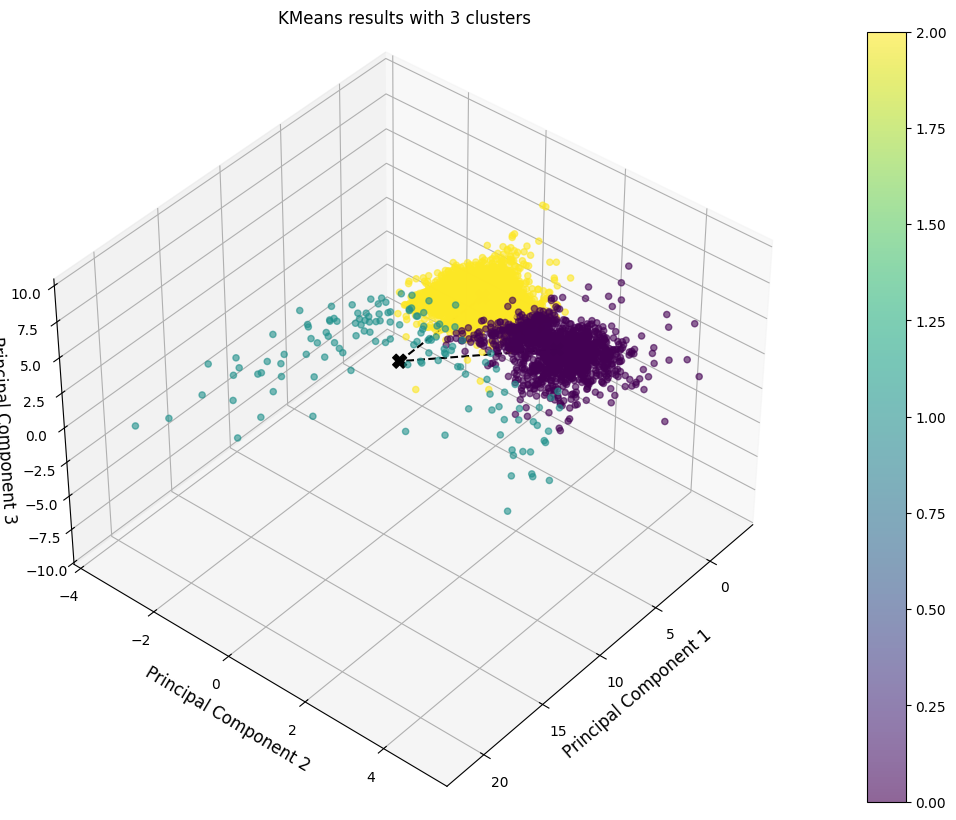

In [172]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_pca3, cmap='viridis', alpha=0.6)
for i in range(len(centroids3) - 1):
    ax.plot([centroids3[i, 0], centroids3[i+1, 0]], 
            [centroids3[i, 1], centroids3[i+1, 1]], 
            [centroids3[i, 2], centroids3[i+1, 2]], 
            color='black', linestyle='dashed')

ax.scatter(centroids3[:, 0], centroids3[:, 1], centroids3[:, 2], s=100, c='black', marker='X')
ax.view_init(elev=40., azim=40)
ax.set_title('KMeans results with 3 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

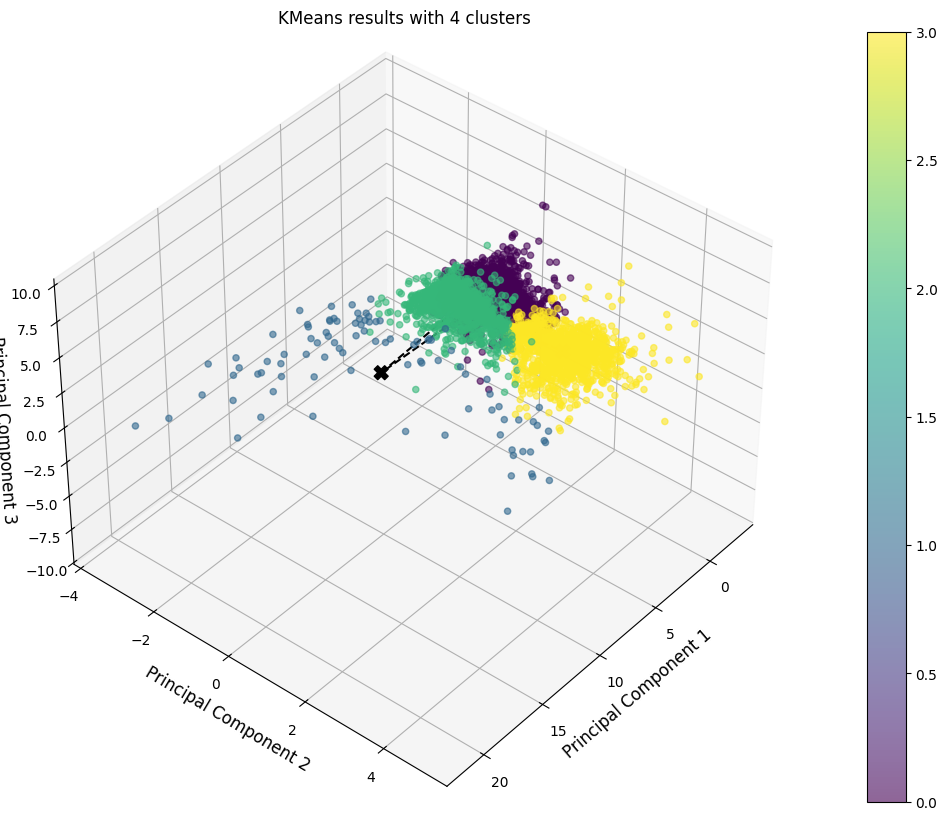

In [169]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_pca4, cmap='viridis', alpha=0.6)
for i in range(len(centroids4) - 1):
    ax.plot([centroids4[i, 0], centroids4[i+1, 0]], 
            [centroids4[i, 1], centroids4[i+1, 1]], 
            [centroids4[i, 2], centroids4[i+1, 2]], 
            color='black', linestyle='dashed')

ax.scatter(centroids4[:, 0], centroids4[:, 1], centroids4[:, 2], s=100, c='black', marker='X')
ax.view_init(elev=40., azim=40)
ax.set_title('KMeans results with 4 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

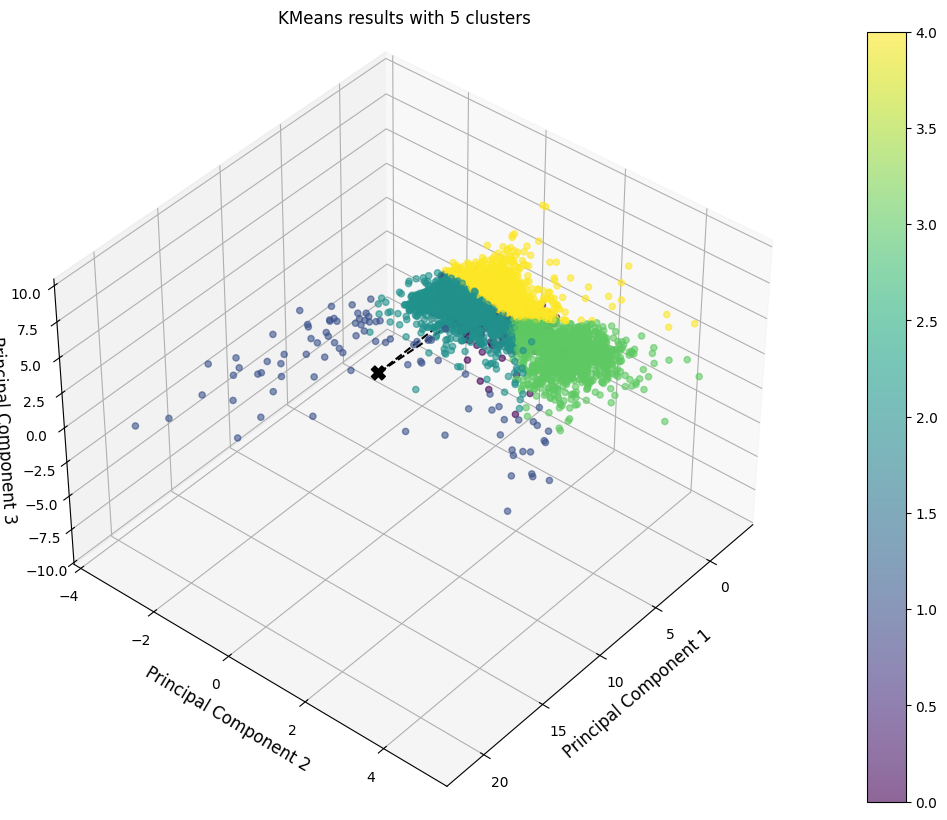

In [170]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_pca5, cmap='viridis', alpha=0.6)
for i in range(len(centroids) - 1):
    ax.plot([centroids[i, 0], centroids[i+1, 0]], 
            [centroids[i, 1], centroids[i+1, 1]], 
            [centroids[i, 2], centroids[i+1, 2]], 
            color='black', linestyle='dashed')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, c='black', marker='X')
ax.view_init(elev=40., azim=40)
ax.set_title('KMeans results with 5 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

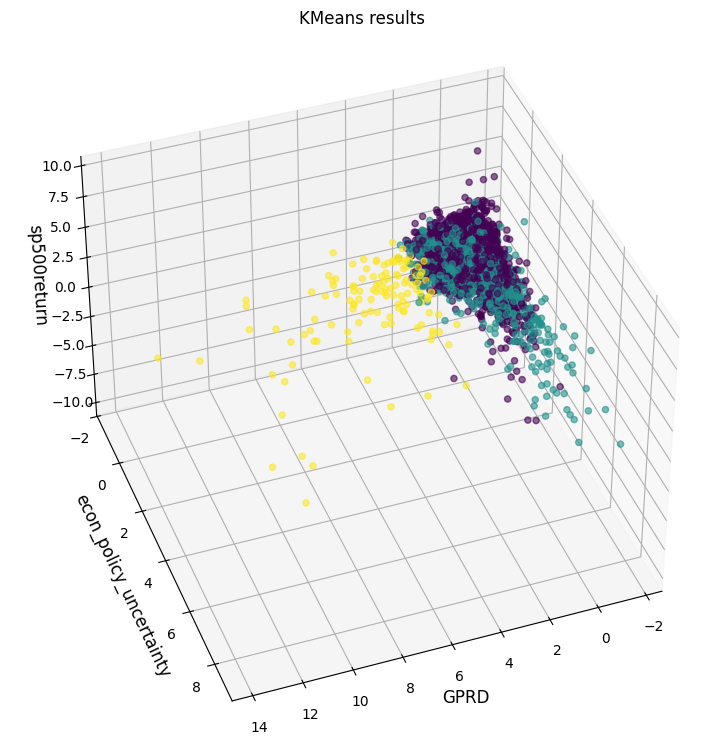

In [53]:
# ###########plot 3D
# fig = plt.figure(figsize=(20, 10))
# ax = fig.add_subplot(1,2,1, projection='3d')
# ax.scatter(df2[:, 0], df2[:, 3], df2[:, 4], c=labels, cmap='viridis', alpha=0.6)
# ax.view_init(elev=40., azim=70)
# ax.set_title('KMeans results',fontsize=12)
# ax.set_xlabel('GPRD',fontsize=12)
# ax.set_ylabel('econ_policy_uncertainty',fontsize=12)
# ax.set_zlabel('sp500return',fontsize=12)
# plt.show()

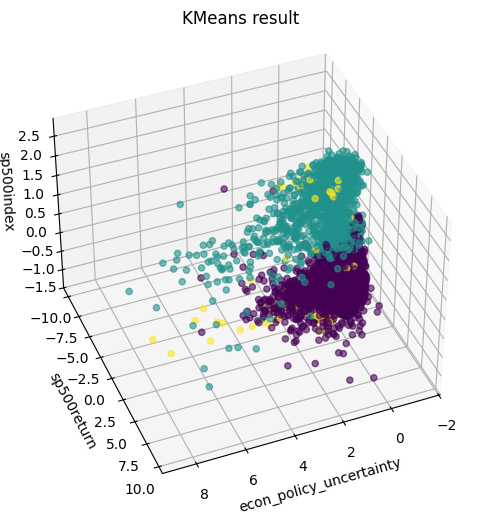

In [52]:
# ###########plot 3D
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df2[:, 3], df2[:, 4], df2[:, 5], c=labels, cmap='viridis', alpha=0.6)
# ax.view_init(elev=40., azim=68)
# ax.set_title('KMeans result')
# ax.set_xlabel('econ_policy_uncertainty')
# ax.set_ylabel('sp500return')
# ax.set_zlabel('sp500index')
# plt.show()

In [9]:
sse = []
silhouette_avg = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df2)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df2, labels)
    silhouette_avg.append(score)

d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\YT\YTpaper\insiderinformedcyber\GPU\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


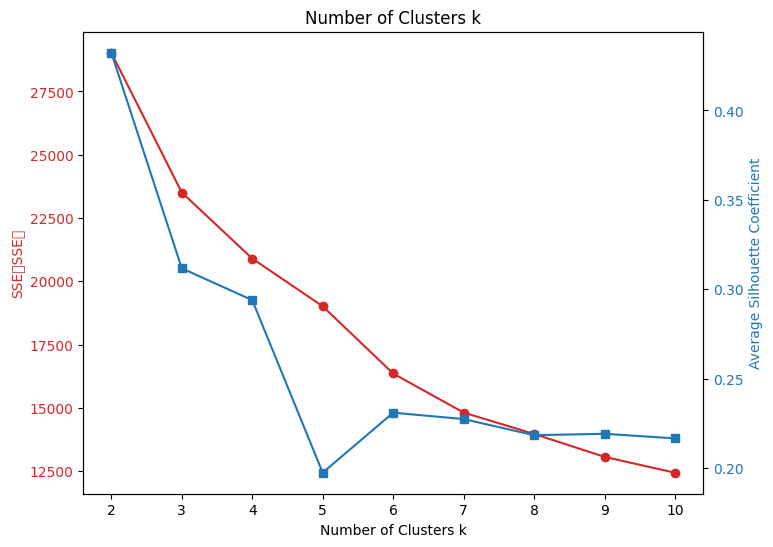

In [12]:
# plot result
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('SSE（SSE）', color=color)
ax1.plot(k_range, sse, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_range)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Silhouette Coefficient', color=color)
ax2.plot(k_range, silhouette_avg, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Clusters k')
plt.show()

In [54]:
kmeans_new = KMeans(n_clusters=5, random_state=0)
kmeans_new.fit(df2)

KMeans(n_clusters=5, random_state=0)

In [55]:
labels_5 = kmeans_new.labels_
labels_5

array([4, 0, 0, ..., 1, 1, 1])

In [85]:
df['cluster_5'] = labels_5

In [86]:
df.dtypes

value                 float64
GPRD                  float64
GPRD_ACT              float64
GPRD_THREAT           float64
daily_policy_index    float64
sprtrn                float64
spindx                float64
oil_return            float64
cluster_5               int32
dtype: object

In [87]:
cluster_kmeans_means = df.groupby('cluster_5').mean()
print(cluster_kmeans_means)

               value        GPRD    GPRD_ACT  GPRD_THREAT  daily_policy_index  \
cluster_5                                                                       
0          62.338787  108.296024  116.465387   102.145390           83.254509   
1          70.780986  131.727979   95.830820   163.709547          113.754026   
2          42.282364  454.601769  629.950178   357.087561          209.250091   
3          57.540616   80.729422   71.698427    85.600085          311.406158   
4          61.688015   90.794518   94.274245    86.808363          104.405163   

             sprtrn       spindx  oil_return  
cluster_5                                     
0          0.004206  1515.497019    0.001638  
1          0.000613  3589.325489   -0.000511  
2          0.000085  1677.342818   -0.001188  
3          0.007354  2236.996084    0.023121  
4         -0.014554  1438.657558   -0.007266  


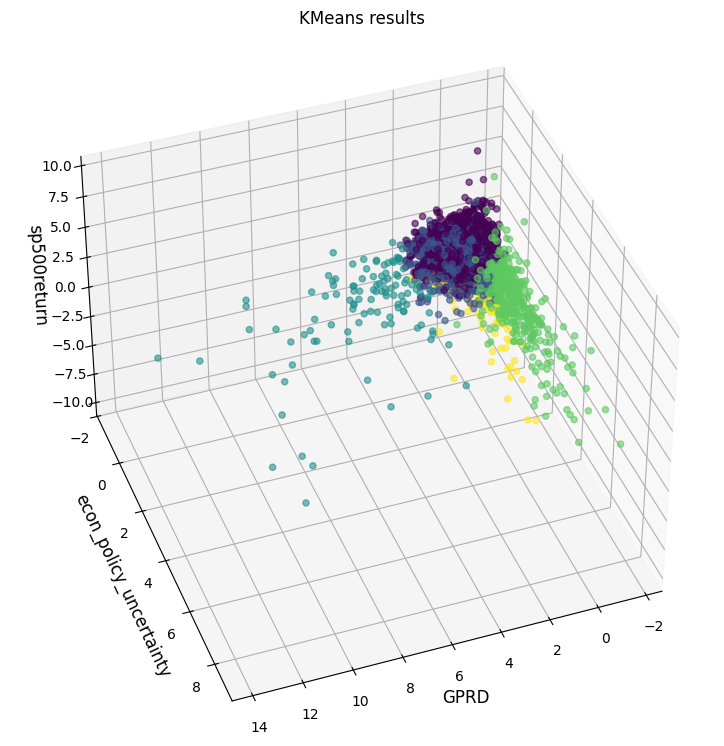

In [57]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2[:, 0], df2[:, 3], df2[:, 4], c=labels_5, cmap='viridis', alpha=0.6)
ax.view_init(elev=40., azim=70)
ax.set_title('KMeans results',fontsize=12)
ax.set_xlabel('GPRD',fontsize=12)
ax.set_ylabel('econ_policy_uncertainty',fontsize=12)
ax.set_zlabel('sp500return',fontsize=12)
plt.show()

Hierarchical Clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_distances

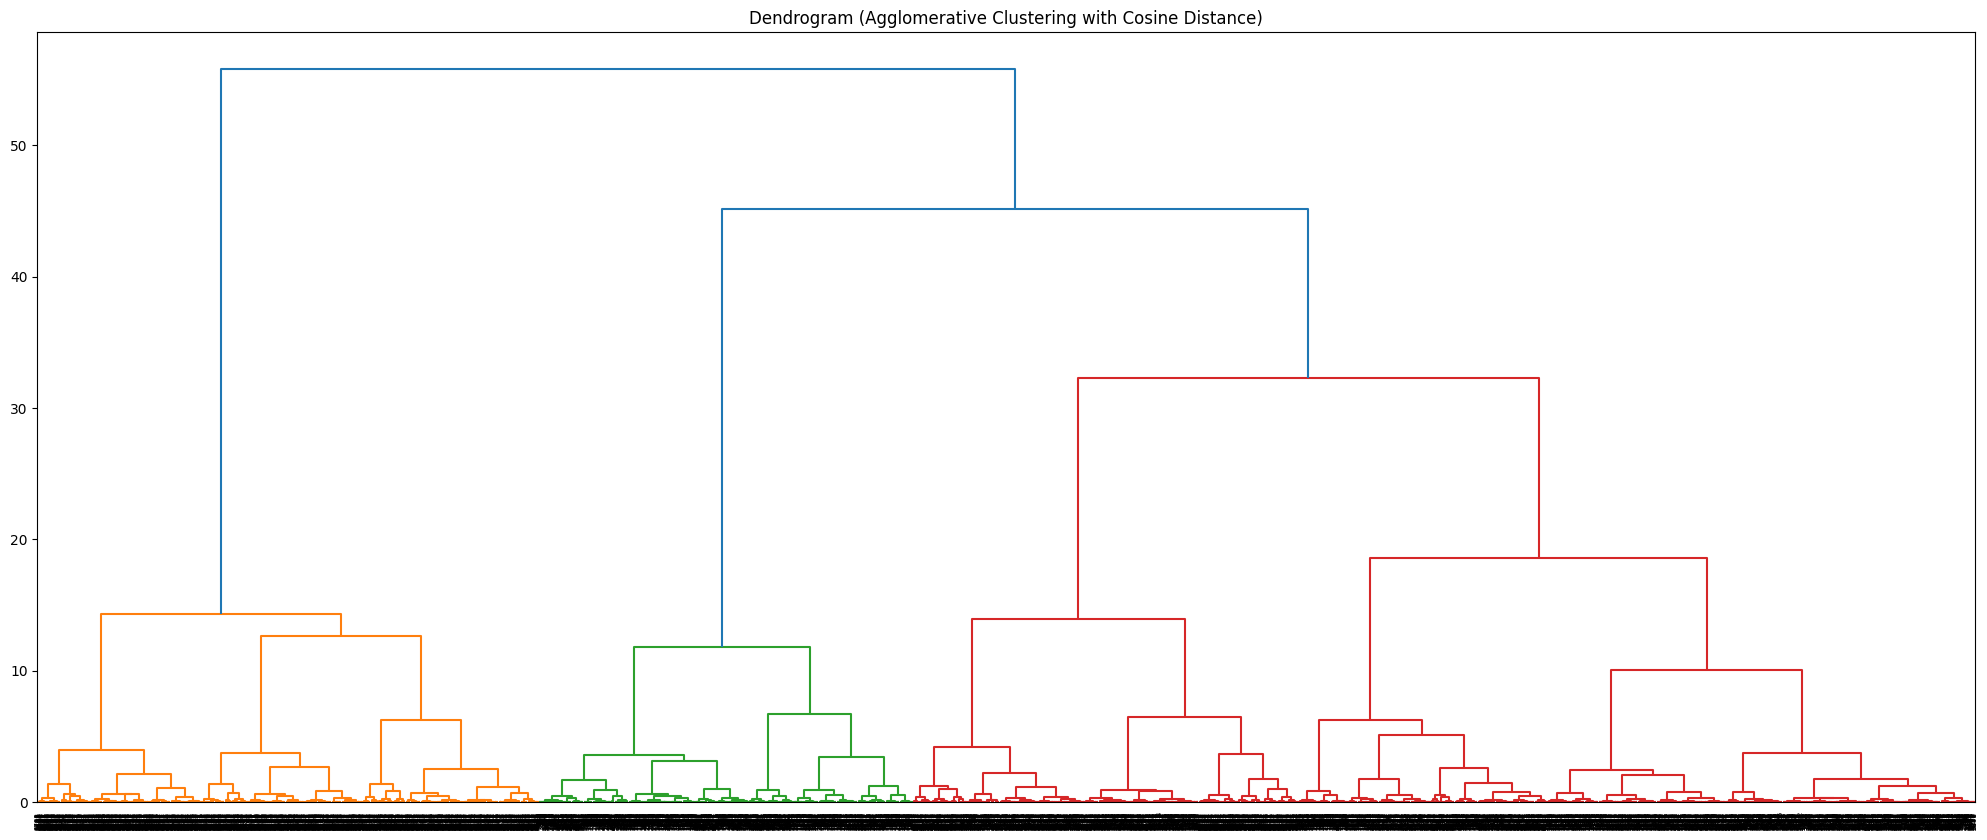

In [175]:

cosdist = pdist(Result, metric='cosine')  


linkage_matrix = linkage(cosdist, method='ward')

# dendrogram
plt.figure(figsize=(25, 10))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Agglomerative Clustering with Cosine Distance)")
plt.show()


In [176]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
# AgglomerativeClustering(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

In [180]:
agg_clustering_4 = AgglomerativeClustering(n_clusters=4)

In [181]:
labels_agg_4 = agg_clustering_4.fit_predict(Result)

In [88]:
df['cluster_agg'] = labels_agg

In [89]:
cluster_agg_means = df.groupby('cluster_agg').mean()
print(cluster_agg_means)

                 value        GPRD    GPRD_ACT  GPRD_THREAT  \
cluster_agg                                                   
0            61.869096  103.870349  106.731562   101.231197   
1            63.129106   83.836554   78.721683    86.207196   
2            73.497404  125.907526   94.141504   154.571649   
3            25.516491  547.197039  895.765860   309.459123   
4            57.343430  279.731287  285.534597   303.890934   

             daily_policy_index    sprtrn       spindx  oil_return  cluster_5  
cluster_agg                                                                    
0                     85.291544 -0.000946  1620.443727   -0.000764   1.007440  
1                    253.749595  0.011206  1785.779494    0.018168   2.060708  
2                    124.598270 -0.000955  3790.020551   -0.000943   1.193258  
3                    226.162105  0.000165  1039.616667   -0.008870   2.000000  
4                    150.086453 -0.000700  2348.509244   -0.000303   1.255814 

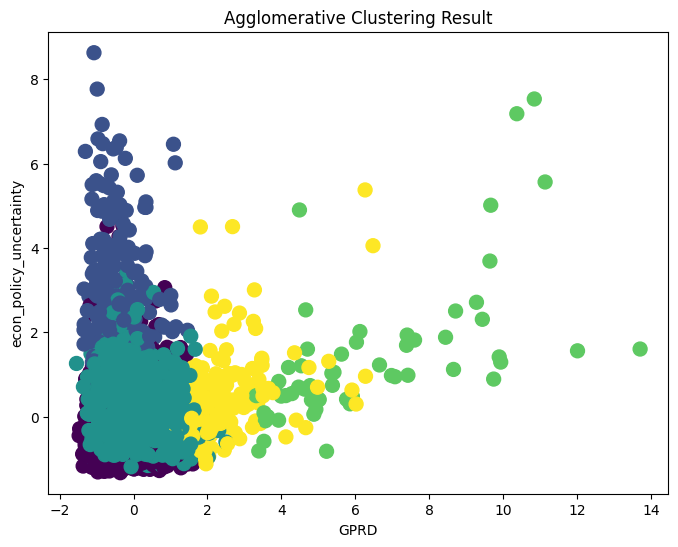

In [67]:
# fig = plt.figure(figsize=(8, 6))
# plt.scatter(Result[:, 0], Result[:, 1], c=labels_agg, cmap='viridis', s=100)
# plt.title('Agglomerative Clustering Result')
# plt.xlabel('GPRD')
# plt.ylabel('econ_policy_uncertainty')
# plt.show()

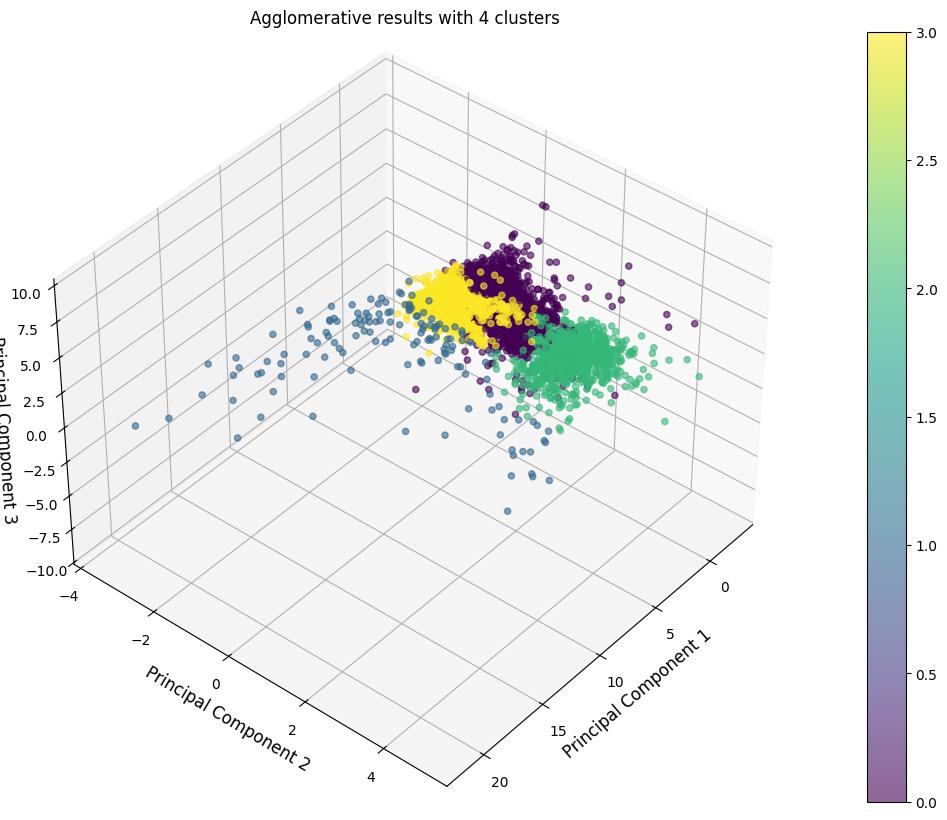

In [182]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_agg_4, cmap='viridis', alpha=0.6)
ax.view_init(elev=40., azim=40)
ax.set_title('Agglomerative results with 4 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

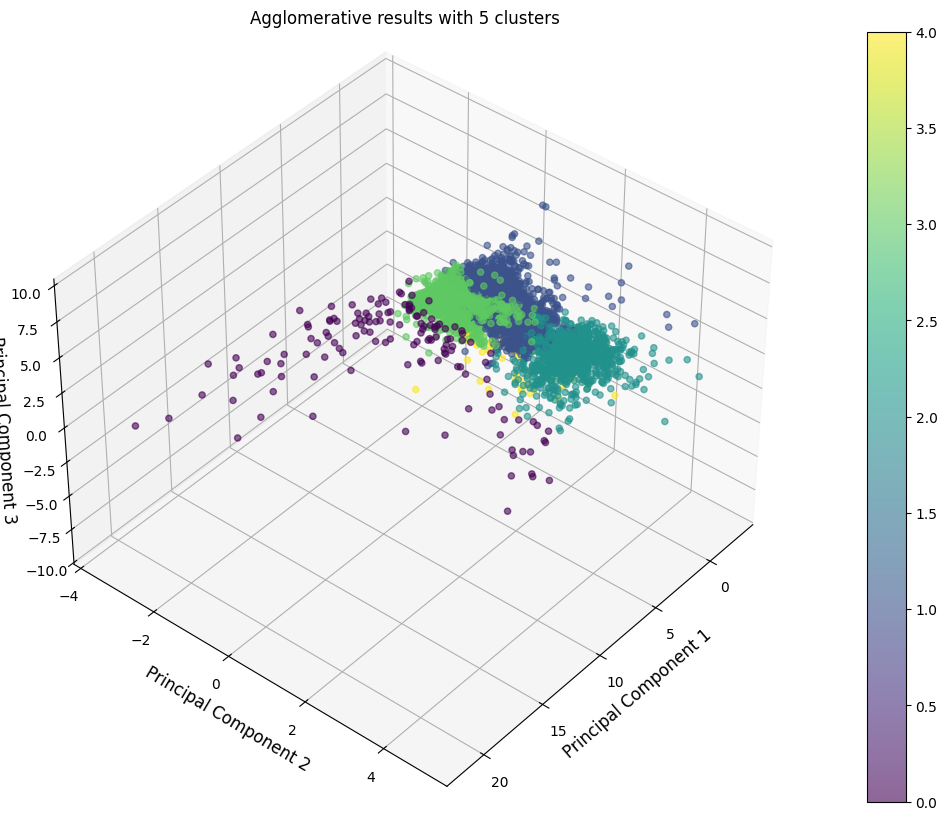

In [179]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_agg, cmap='viridis', alpha=0.6)
ax.view_init(elev=40., azim=40)
ax.set_title('Agglomerative results with 5 clusters', fontsize=12)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

plt.colorbar(scatter)
plt.show()

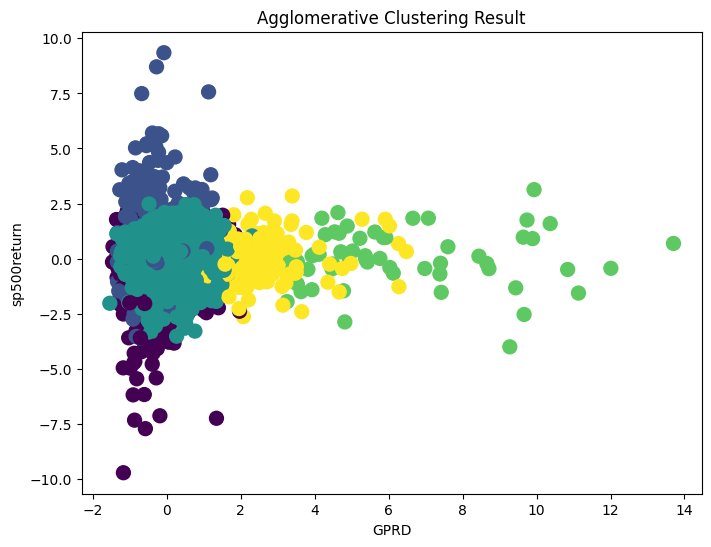

In [66]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df2[:, 0], df2[:, 4], c=labels_agg, cmap='viridis', s=100)
plt.title('Agglomerative Clustering Result')
plt.xlabel('GPRD')
plt.ylabel('sp500return')
plt.show()

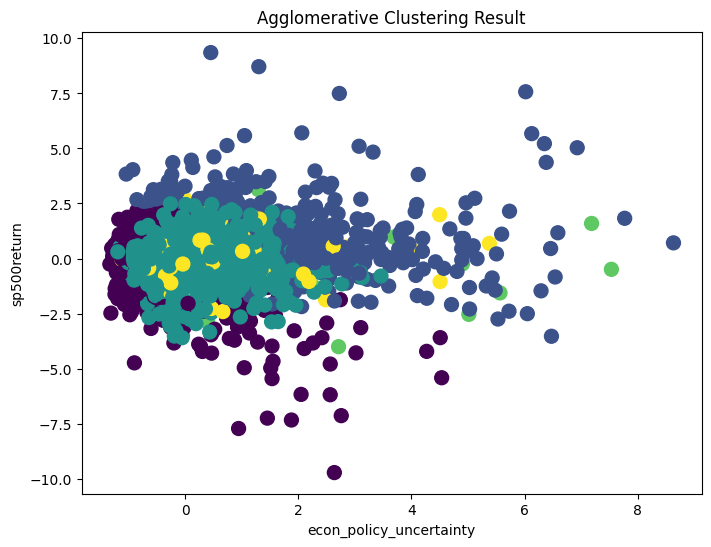

In [68]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df2[:, 3], df2[:, 4], c=labels_agg, cmap='viridis', s=100)
plt.title('Agglomerative Clustering Result')
plt.xlabel('econ_policy_uncertainty')
plt.ylabel('sp500return')
plt.show()

DBSCAN

In [90]:
from sklearn.cluster import DBSCAN
import seaborn as sns

In [183]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [184]:
labels_dbscan = dbscan.fit_predict(Result)

In [188]:
labels_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_clusters

9

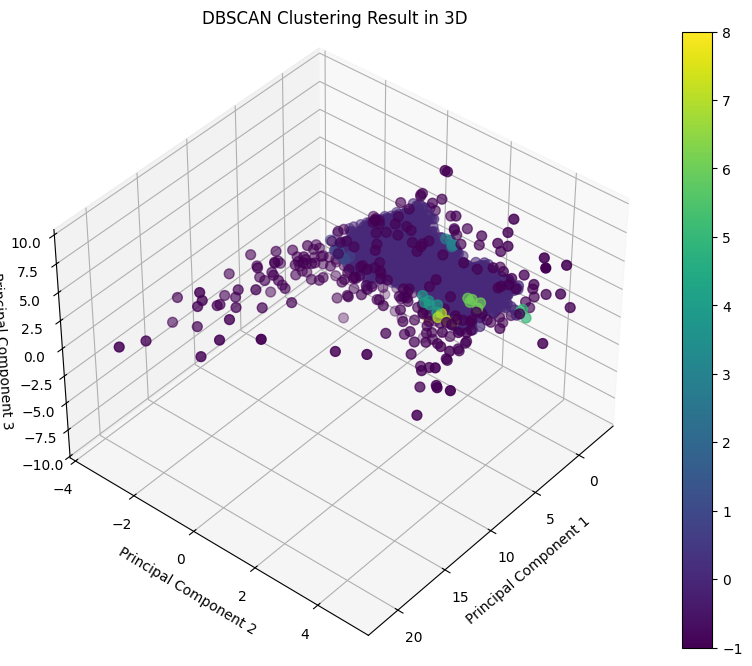

In [187]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(Result[:, 0], Result[:, 1], Result[:, 2], c=labels_dbscan, cmap='viridis', s=50)
ax.view_init(elev=40., azim=40)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('DBSCAN Clustering Result in 3D')
plt.colorbar(scatter)
plt.show()

In [93]:
df['cluster_dbscan'] = labels_dbscan

In [94]:
df['cluster_dbscan'].value_counts()

cluster_dbscan
 0     4049
-1     1586
 7      273
 5       10
 12      10
 8        9
 10       8
 13       8
 1        6
 11       5
 9        5
 4        5
 6        5
 19       5
 14       5
 17       4
 15       4
 18       4
 2        4
 3        4
 16       4
Name: count, dtype: int64

In [95]:
cluster_dbscan_means = df.groupby('cluster_dbscan').mean()
print(cluster_dbscan_means)

                    value        GPRD    GPRD_ACT  GPRD_THREAT  \
cluster_dbscan                                                   
-1              59.430605  155.505310  158.700386   159.292637   
 0              63.811524   99.588137  100.529021    98.044170   
 1              26.708333   42.593711   34.309189    48.815386   
 2              22.427500  179.491840  306.154755    87.527449   
 3              60.572500   52.558243   67.608970    38.498208   
 4              81.746000   70.625787   67.046433    69.323796   
 5              42.753000   89.225023   39.344024   124.282901   
 6              41.720000   76.944852   38.019094   105.615327   
 7              75.079048   96.095381   76.823953   113.269873   
 8              75.340000  139.024164  118.081609   166.045922   
 9              74.848000  108.633612  140.577914    88.223570   
 10             80.405000  135.865458   31.216913   204.155874   
 11             95.438000  171.426993  146.066437   209.413754   
 12       

In [104]:
df1['cluster_dbscan'] = labels_dbscan

In [113]:
df1=df1.drop(['cluster_dbscan','cluster_5','cluster_agg'],axis=1)

In [114]:
df2 = pd.DataFrame(df2, columns=df1.columns)

In [117]:
df2.head()

GPRD  GPRD_ACT  GPRD_THREAT  daily_policy_index    sprtrn    spindx
0 -0.303682  0.020150    -0.651216           -0.019840 -3.124041 -0.540910
1 -0.983328 -0.636740    -0.872837            0.152481  0.133779 -0.538374
2 -0.917878 -0.594776    -0.828886           -0.709867  0.055624 -0.537111
3 -1.070111 -0.692381    -0.903299           -0.853323  2.170007 -0.501269
4 -0.718009 -0.535393    -0.632474           -0.826688  0.883611 -0.486063

In [118]:
df.head()

value       GPRD    GPRD_ACT  GPRD_THREAT  daily_policy_index    sprtrn  \
0  25.56  93.751915  116.829170    71.461182              109.31 -0.038345   
1  24.65  47.565075   47.418663    56.502644              123.22  0.001922   
2  24.79  52.012840   51.852737    59.469170               53.61  0.000956   
3  24.79  41.667515   41.539261    54.446617               42.03  0.027090   
4  24.71  65.595398   58.127548    72.726173               44.18  0.011190   

    spindx  oil_return  cluster_5  cluster_agg  cluster_dbscan  
0  1399.42   -0.007825          4            0              -1  
1  1402.11   -0.036917          0            0               0  
2  1403.45    0.005647          0            0               0  
3  1441.47    0.000000          0            0               1  
4  1457.60   -0.003238          0            0               0

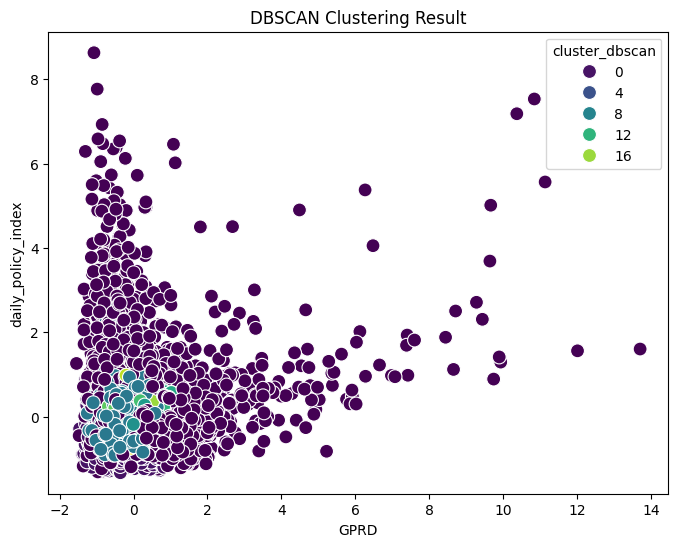

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['GPRD'], y=df2['daily_policy_index'], hue=df['cluster_dbscan'], palette='viridis', s=100)
plt.title('DBSCAN Clustering Result')
plt.show()

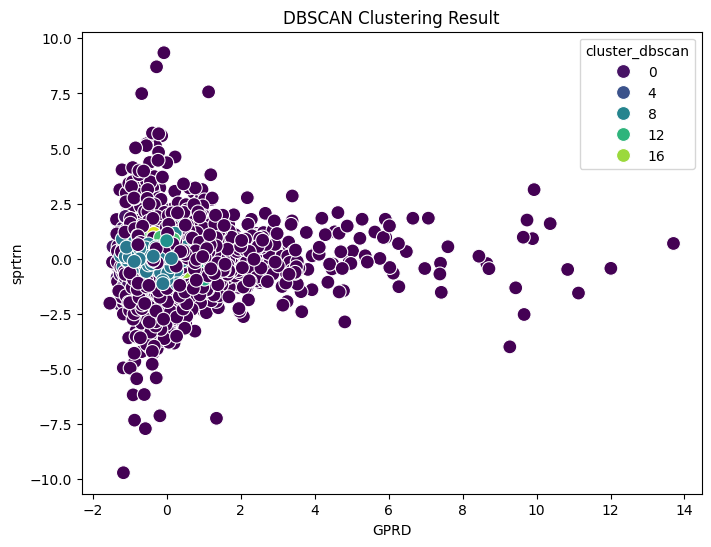

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['GPRD'], y=df2['sprtrn'], hue=df['cluster_dbscan'], palette='viridis', s=100)
plt.title('DBSCAN Clustering Result')
plt.show()

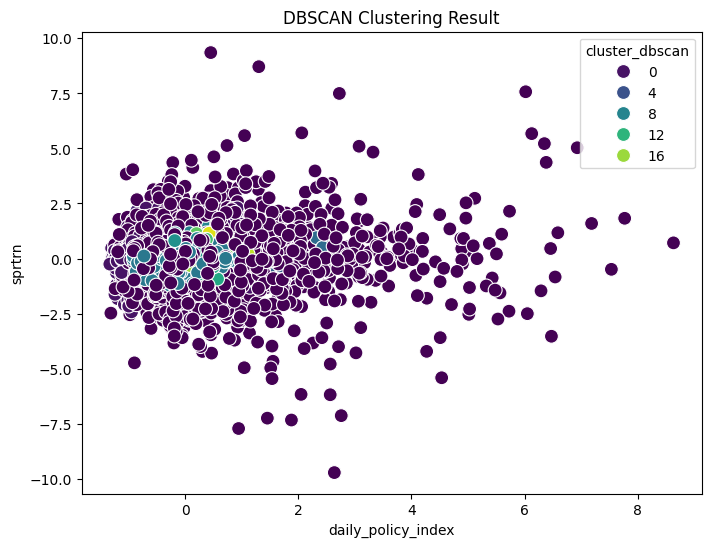

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['daily_policy_index'], y=df2['sprtrn'], hue=df['cluster_dbscan'], palette='viridis', s=100)
plt.title('DBSCAN Clustering Result')
plt.show()

In [123]:
from sklearn.decomposition import PCA

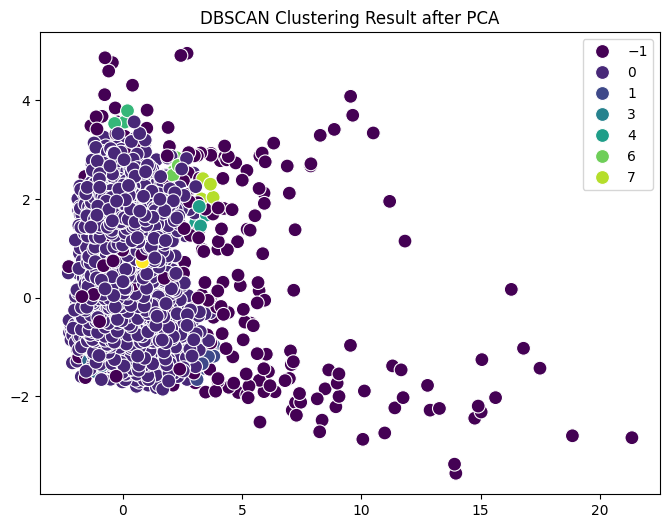

In [124]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df2)


dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_pca = dbscan.fit_predict(df_pca)

# 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_dbscan_pca, palette='viridis', s=100)
plt.title('DBSCAN Clustering Result after PCA')
plt.show()